In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as cf
import pandas as pd

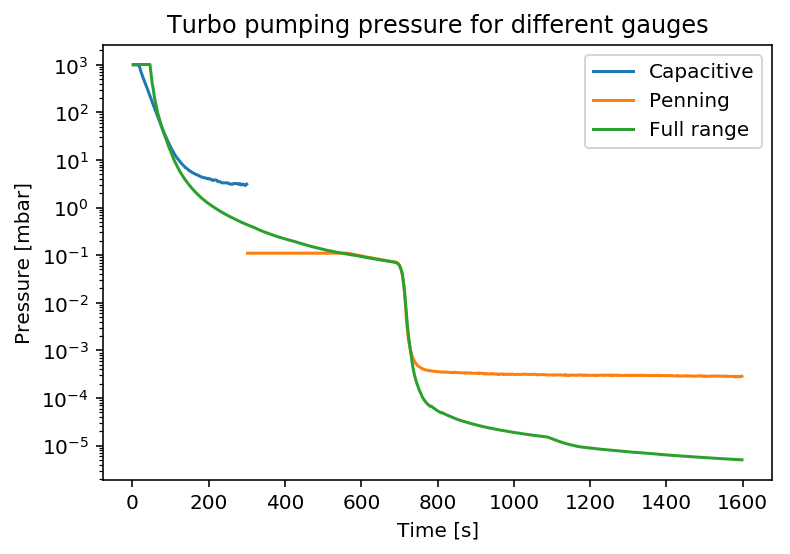

In [2]:
data=[]
data.append( pd.read_csv("20180307_JonasLehnenGuntherTuerk/20180307_JonasGunther_PumpDownPressure",delimiter="\t" ))

for entry in data:
    time= entry.values[:,0]
    p1= entry.values[:,1]
    p2= entry.values[:,2]
    p3= entry.values[:,3]
    
r1,r2,r3,i=0,0,0,0
while time[i]<1600:
    if time[r3]<300:
        r3=r3+1
    i=i+1
    
fig,ax=plt.subplots(dpi=144)
ax.plot(time[:r3],p3[:r3] , label="Capacitive")
ax.plot(time[r3:i],p2[r3:i],label="Penning")
ax.plot(time[:i],p1[:i],    label="Full range")
ax.legend()
ax.set(yscale="log",xlabel="Time [s]",ylabel="Pressure [mbar]",title="Turbo pumping pressure for different gauges");
fig.savefig("Plots/PumpingPressure.png")

In [5]:
print(time[800])
print(time[600])

pStart=p1[600]
pEnd=p1[800]
Seff= 30/1000 / 1500 *np.log(pStart/pEnd) # /1000 für SI m^3
dndt= (pStart+pEnd)*1e-3/2 * Seff /c.Boltzmann / 293 
dm = dndt*29/c.N_A

print(dndt, dm)



1600.25
1200.68
19545672.316 9.41234206612e-16
